In [100]:
from google.colab import files

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

In [102]:
files.upload();

Saving data_set_v2.csv to data_set_v2.csv


In [103]:
df_data = pd.read_csv("data_set_v2.csv",header = 0, usecols = [1,2,3,4,5])

X_data = df_data[[str(i) for i in range(3)]]
X_data.columns = ["th1","th2","del"]
y_data = df_data[[str(3)]] > 0.5
y_data.columns = ["W"]

display(y_data.head())
display(df_data.head())

,W
0,False
1,True
2,False
3,True
4,True


,0,1,2,3,4
0,-4.155610,-0.545381,0.487881,0.0,0.0
1,-1.765345,3.127651,0.487881,1.0,1.0
2,3.116922,5.827655,0.487881,0.0,0.0
3,1.527525,4.677656,0.487881,1.0,0.0
4,0.901529,-3.903904,0.487881,1.0,1.0


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, shuffle = True, test_size = 0.8)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

model accuracy: 0.924051724137931
model f1_score: 0.8952562121031982
model recall_score: 0.8703190013869625
model precision_score: 0.9216646266829865


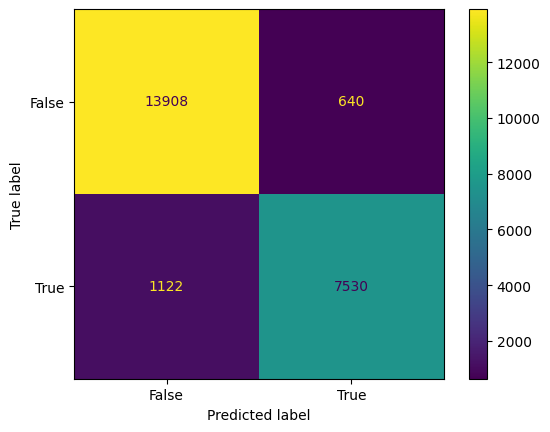

In [106]:
y_pred = model.predict(X_test)

print(f"model accuracy: {accuracy_score(y_test, y_pred)}")
print(f"model f1_score: {f1_score(y_test, y_pred)}")
print(f"model recall_score: {recall_score(y_test, y_pred)}")
print(f"model precision_score: {precision_score(y_test, y_pred)}")

cnf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_mat, display_labels=model.classes_)
disp.plot()
plt.show()

In [107]:
th_plus = np.arange(-2 * np.pi , 2 * np.pi, 0.01)
th_minus = np.arange(-2 * np.pi , 2 * np.pi, 0.01)

dels = [0,0.5,1,1.5,2,2.5,3]

In [108]:
def predict(model, th_plus, th_minus,  del_):
  th_plus_m , th_minus_m = np.meshgrid(th_plus, th_minus)
  n = np.prod(th_plus_m.shape)
  args_ = np.concatenate((th_plus_m.reshape(-1,1),th_minus_m.reshape(-1,1),np.full((n,1), del_)), axis = 1)
  y_pred = model.predict(args_)
  return th_plus_m, th_minus_m, y_pred.reshape(th_plus_m.shape)


In [109]:
th_plus_m, th_minus_m, y_pred = predict(model, th_plus, th_minus, dels[6])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


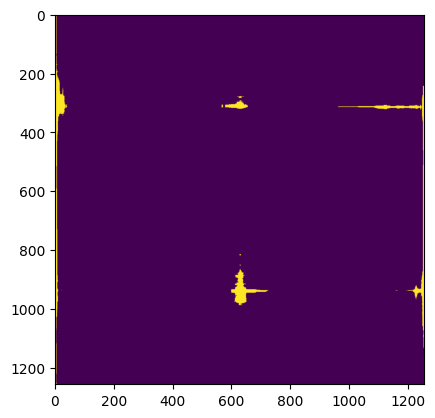

In [110]:
plt.imshow(y_pred)

In [123]:
from tensorflow import keras
from tensorflow.keras import layers

In [124]:
model_2 = keras.Sequential([
    layers.Input([3]),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dense(units = 512, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [125]:
model_2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [126]:
history = model_2.fit(
    X_train,
    y_train,
    validation_data = (X_test,y_test),
    batch_size = 512,
    epochs = 1000,
    verbose  = 1
    )

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - binary_accuracy: 0.5842 - loss: 0.6632 - val_binary_accuracy: 0.6520 - val_loss: 0.5824
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - binary_accuracy: 0.6769 - loss: 0.5717 - val_binary_accuracy: 0.7000 - val_loss: 0.5569
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - binary_accuracy: 0.7107 - loss: 0.5500 - val_binary_accuracy: 0.7176 - val_loss: 0.5389
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - binary_accuracy: 0.7284 - loss: 0.5386 - val_binary_accuracy: 0.7272 - val_loss: 0.5271
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - binary_accuracy: 0.7400 - loss: 0.5265 - val_binary_accuracy: 0.7466 - val_loss: 0.5156
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - binary_accuracy: 0.7431 - loss: 0.5184 - val_binary_accuracy: 0.7528 - val_loss: 0.5043
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - binary_accuracy: 0.7604 - loss: 0.5047 - val_binary_accuracy: 0.7565 - val_loss: 0.4891

Best Validation Loss: 0.0834
Best Validation Accuracy: 0.9662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

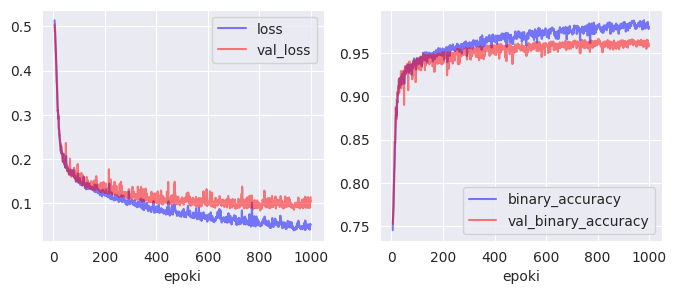

In [153]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
fig = plt.figure(figsize = (8,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel("epoki")
ax2.set_xlabel("epoki")

history_df.loc[5:, ['loss', 'val_loss']].plot(ax = ax1, color = ["blue","red"], alpha = 0.5, label = ["funckja straty: dane treningowe","funckja straty: dane testowe" ])
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax = ax2, color = ["blue","red"], alpha = 0.5)

print(("Best Validation Loss: {:0.4f}" +
      "\nBest Validation Accuracy: {:0.4f}")
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

fig.savefig("Loss.pdf", format = "pdf", bbox_inches = "tight")
files.download("Loss.pdf")

In [144]:
th_plus_m_2 = []
th_minus_m_2 = []
y_pred_2 = []

for i,del_ in enumerate(dels[:-1]):
  th_plus_v_2, th_minus_v_2, y_pred_v_2 = predict(model_2, th_plus, th_minus, del_)
  th_plus_m_2.append(th_plus_v_2)
  th_minus_m_2.append(th_minus_v_2)
  y_pred_2.append(y_pred_v_2)

49377/49377 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step
49377/49377 ━━━━━━━━━━━━━━━━━━━━ 100s 2ms/step
49377/49377 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step
49377/49377 ━━━━━━━━━━━━━━━━━━━━ 133s 3ms/step
49377/49377 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step
49377/49377 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

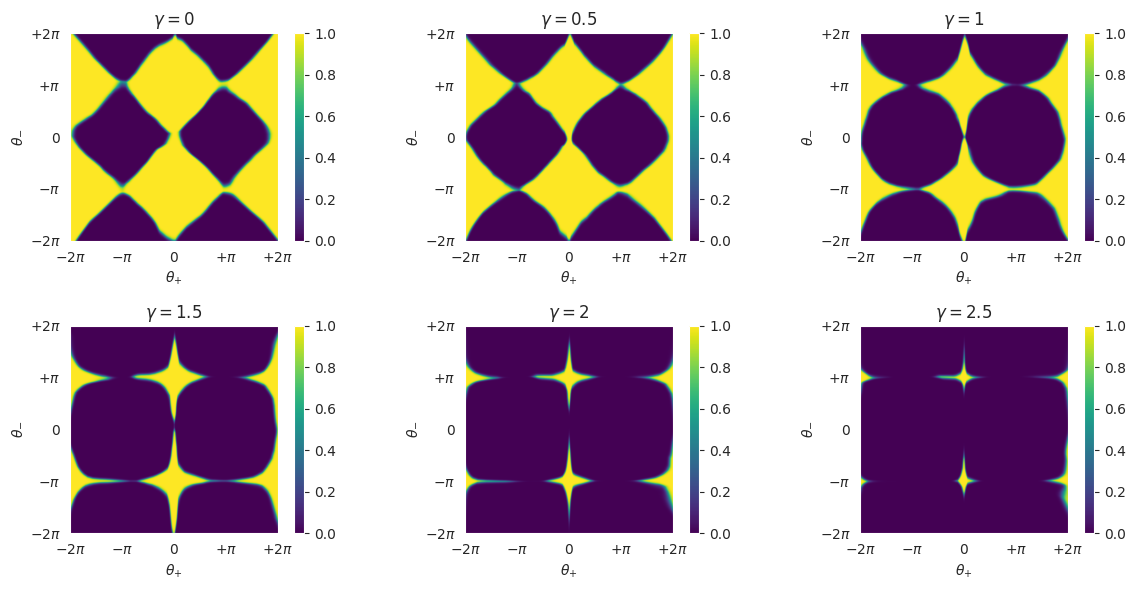

In [156]:
fig = plt.figure(figsize = (12,6))
for i, (th_plus_, th_minus_, y_pred_) in enumerate(zip(th_plus_m_2,th_minus_m_2, y_pred_2)):
  ax = fig.add_subplot(2,3,i+1)
  cmm = ax.imshow(y_pred_, extent = [-2* np.pi , 2 *np.pi,-2* np.pi , 2 *np.pi ], cmap = "viridis")
  ax.set_xlabel(r"$\theta_{+}$")
  ax.set_ylabel(r"$\theta_{-}$")
  ax.set_title(r"$\gamma = $" + f"{dels[i]}")
  plt.grid(False)
  fig.colorbar(cmm)
  ax.set_xticks([- 2 * np.pi + i * 4 * np.pi /4 for i in range(5)])
  ax.set_xticklabels([r"$-2\pi$", r"$-\pi$", r"$0$", r"$+\pi$", r"$+2\pi$"])
  ax.set_yticks([- 2 * np.pi + i * 4 * np.pi /4 for i in range(5)])
  ax.set_yticklabels([r"$-2\pi$", r"$-\pi$", r"$0$", r"$+\pi$", r"$+2\pi$"])

plt.tight_layout()
fig.savefig("TopoPhases.pdf", format = "pdf", bbox_inches = "tight")
files.download("TopoPhases.pdf")

model accuracy: 0.9572844827586207
model f1_score: 0.9409239940387482
model recall_score: 0.9121590383726306
model precision_score: 0.9715622307029422


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

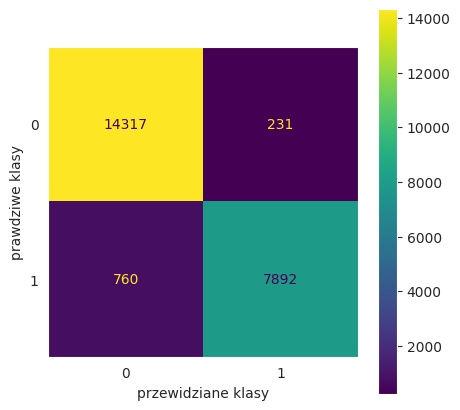

In [157]:
y_pred_val = model_2(X_test) > 0.5

print(f"model accuracy: {accuracy_score(y_test, y_pred_val)}")
print(f"model f1_score: {f1_score(y_test, y_pred_val)}")
print(f"model recall_score: {recall_score(y_test, y_pred_val)}")
print(f"model precision_score: {precision_score(y_test, y_pred_val)}")

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)

cnf_mat_2 = confusion_matrix(y_test, y_pred_val)

disp = ConfusionMatrixDisplay(cnf_mat_2)
disp.plot(ax = ax)

ax.set_ylabel("prawdziwe klasy")
ax.set_xlabel("przewidziane klasy")
ax.grid(False)

fig.savefig("ConfusionMat.pdf", format = "pdf", bbox_inches = "tight")
files.download("ConfusionMat.pdf")